In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load & inspect Data

In [ ]:
df = pd.read_csv('cover_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.shape

(581012, 55)

In [ ]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [ ]:
df['class'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [ ]:
df['class'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [ ]:
#Fairly Inbalanced

Split data into features & labels and then training & testing.

In [ ]:
def prep_data(df):
  raw_data = df.values
  X, y = raw_data[:, :-1], raw_data[:, -1]
  # Split into train and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

  # normalize data
  scaler = StandardScaler()
  X_train_normalized = scaler.fit_transform(X_train)
  X_test_normalized = scaler.transform(X_test)

  return X_train_normalized, X_test_normalized, y_train, y_test


Model Creation

In [ ]:
def create_model(num_features):
  model = Sequential()
  model.add(layers.Dense(64, input_dim=num_features, activation='relu'))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dense(8, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Function for creating a heatmap

In [ ]:
def plot_heatmap(class_names, y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    plt.show()
    

Function for plotting accuracy and loss over epochs

In [ ]:
def plot_history(history, param):
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

Main Function to drive programme

In [ ]:
def main():
  cols = df.columns.tolist()
  features, label = cols[:-1], cols[-1]
  X_train, X_test, y_train, y_test = prep_data(df)
  num_features = len(features)
  model = create_model(num_features)
  num_epochs = 100
  batch_size = 1024
  earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)
  history = model.fit(X_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        callbacks=[earlystop_callback],
                        validation_split=0.1,
                        verbose=1)
  
  plot_history(history, 'acc')
  plot_history(history, 'loss')

  score = model.evaluate(X_test, y_test, verbose=0)
  print(f'Test loss: {score[0]}')
  print(f'Test accuracy: {score[1]}')

  y_pred = model.predict(X_test)

  y_pred = np.argmax(y_pred, axis=1)
  class_names = ['Spruce/Fir', 'Lodgepole Pine',
                  'Ponderosa Pine', 'Cottonwood/Willow',
                  'Aspen', 'Douglas-fir', 'Krummholz']
  print(classification_report(y_test, y_pred, target_names=class_names))
  plot_heatmap(class_names, y_pred, y_test)



Epoch 1/100
409/409 [==============================] - 3s 7ms/step - loss: 1.1147 - accuracy: 0.5640 - val_loss: 0.6088 - val_accuracy: 0.7418
Epoch 2/100
409/409 [==============================] - 3s 7ms/step - loss: 0.6276 - accuracy: 0.7374 - val_loss: 0.5554 - val_accuracy: 0.7598
Epoch 3/100
409/409 [==============================] - 3s 7ms/step - loss: 0.5792 - accuracy: 0.7554 - val_loss: 0.5196 - val_accuracy: 0.7788
Epoch 4/100
409/409 [==============================] - 3s 7ms/step - loss: 0.5463 - accuracy: 0.7684 - val_loss: 0.4919 - val_accuracy: 0.7900
Epoch 5/100
409/409 [==============================] - 3s 7ms/step - loss: 0.5225 - accuracy: 0.7776 - val_loss: 0.4716 - val_accuracy: 0.7979
Epoch 6/100
409/409 [==============================] - 3s 7ms/step - loss: 0.5029 - accuracy: 0.7852 - val_loss: 0.4531 - val_accuracy: 0.8060
Epoch 7/100
409/409 [==============================] - 3s 7ms/step - loss: 0.4861 - accuracy: 0.7929 - val_loss: 0.4390 - val_accuracy: 0.8134

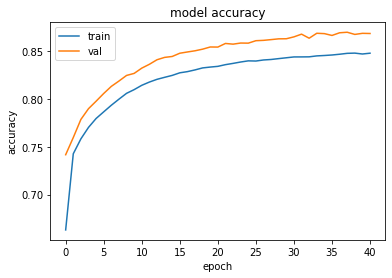

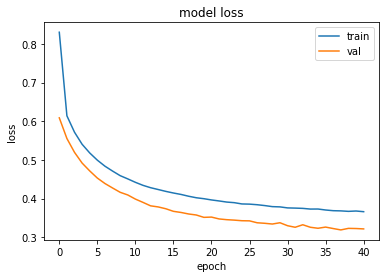

Test loss: 0.323912113904953
Test accuracy: 0.8684371113777161
                   precision    recall  f1-score   support

       Spruce/Fir       0.87      0.87      0.87     42368
   Lodgepole Pine       0.88      0.89      0.89     56661
   Ponderosa Pine       0.81      0.89      0.85      7151
Cottonwood/Willow       0.86      0.55      0.67       549
            Aspen       0.75      0.51      0.61      1899
      Douglas-fir       0.75      0.62      0.68      3473
        Krummholz       0.90      0.87      0.89      4102

         accuracy                           0.87    116203
        macro avg       0.83      0.74      0.78    116203
     weighted avg       0.87      0.87      0.87    116203



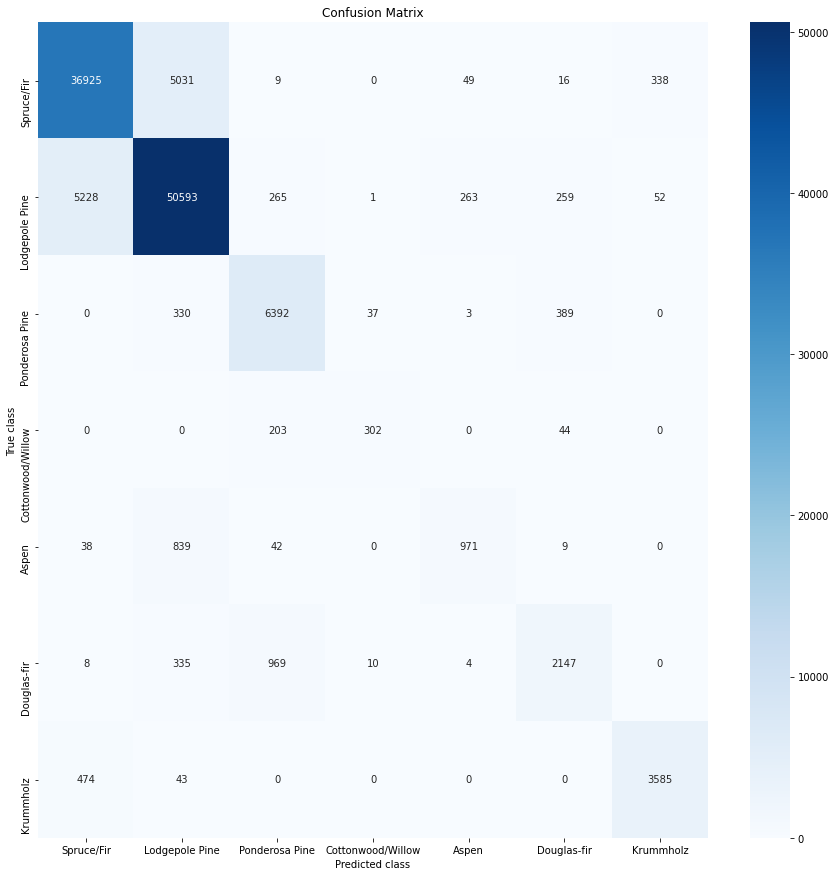

In [ ]:
if __name__ == '__main__':
    main()